<a href="https://colab.research.google.com/github/YazanAlsaid/DistributedSystem_FrankfurtUAS/blob/main/cloud_computing_Yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Apr 21 15:13:01 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   30C    P0             44W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

# **Step 1 : Install the Ultralytics package which includes YOLOv8**

In [ ]:
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 41.0/235.7 GB disk)


# **Step 2: Mount Google Drive (for datasets & model saving)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the path to your dataset
dataset_path = '/content/drive/MyDrive/datasets'

# 📂 List the contents of the dataset folder to confirm the structure
import os
os.listdir(dataset_path)

['README.roboflow.txt',
 'README.dataset.txt',
 'data.yaml',
 'test',
 'train',
 'valid']

In [ ]:
# Load and check the contents of the data.yaml file
with open(os.path.join(dataset_path, 'data.yaml'), 'r') as file:
    print(file.read())


train: '/content/drive/MyDrive/datasets/train/images'
val: '/content/drive/MyDrive/datasets/valid/images'
test: '/content/drive/MyDrive/datasets/test/images'

nc: 3
names: ['fish', 'cat', 'dog']

roboflow:
  workspace: yolo-wea97
  project: datasets-zjnxi
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/yolo-wea97/datasets-zjnxi/dataset/2


# ***Step 3: Train the YOLOv8 Model***

In [ ]:
from ultralytics import YOLO
import os

# Pfad zur Dataset-Konfiguration
data_yaml_path = os.path.join(dataset_path, 'data.yaml')

# YOLOv8 Nano Modell laden
model = YOLO('yolov8n.pt')

# Training starten
model.train(
    data=data_yaml_path,
    epochs=200,
    batch=16,
    imgsz=640,
    project='/content/yolov8_training_results',
    name='yolov8_model',
    exist_ok=True
)

Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/datasets/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/yolov8_training_results, name=yolov8_model, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False,

100%|██████████| 755k/755k [00:00<00:00, 14.6MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,433 parameters, 3,011,417 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 65.0MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.3±0.1 ms, read: 0.2±0.0 MB/s, size: 76.9 KB)


train: Scanning /content/drive/MyDrive/datasets/train/labels.cache... 3078 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3078/3078 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 0.1±0.0 MB/s, size: 43.2 KB)


val: Scanning /content/drive/MyDrive/datasets/valid/labels.cache... 576 images, 0 backgrounds, 0 corrupt: 100%|██████████| 576/576 [00:00<?, ?it/s]


Plotting labels to /content/yolov8_training_results/yolov8_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/yolov8_training_results/yolov8_model
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.11G      1.217      2.224      1.614         22        640: 100%|██████████| 193/193 [00:51<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:15<00:00,  1.18it/s]


                   all        576        798      0.545      0.673      0.592      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      2.64G      1.275      1.798      1.647         17        640: 100%|██████████| 193/193 [00:18<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.18it/s]


                   all        576        798      0.568       0.61      0.594      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.64G      1.335      1.718      1.676         37        640: 100%|██████████| 193/193 [00:17<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.75it/s]

                   all        576        798      0.415      0.455      0.388      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.66G      1.316      1.604      1.667         23        640: 100%|██████████| 193/193 [00:17<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.38it/s]

                   all        576        798      0.606      0.635      0.633      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      2.66G      1.278      1.521      1.627         15        640: 100%|██████████| 193/193 [00:17<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.71it/s]

                   all        576        798      0.699      0.671        0.7      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.66G      1.249      1.418      1.609         14        640: 100%|██████████| 193/193 [00:17<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.70it/s]

                   all        576        798      0.722      0.756      0.792      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      2.66G      1.201      1.363      1.563         15        640: 100%|██████████| 193/193 [00:17<00:00, 11.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.85it/s]

                   all        576        798      0.745      0.725      0.778      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      2.67G      1.182      1.302      1.559         16        640: 100%|██████████| 193/193 [00:17<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.76it/s]

                   all        576        798      0.782      0.695      0.786      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      2.67G      1.172      1.248      1.544         11        640: 100%|██████████| 193/193 [00:17<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.10it/s]

                   all        576        798      0.765       0.78      0.813      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      2.67G      1.154      1.229      1.516         28        640: 100%|██████████| 193/193 [00:17<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.93it/s]

                   all        576        798      0.718      0.764      0.792      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      2.67G      1.131      1.196       1.51         14        640: 100%|██████████| 193/193 [00:17<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.68it/s]

                   all        576        798      0.798      0.756      0.836       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.67G       1.11      1.137      1.476         17        640: 100%|██████████| 193/193 [00:17<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.82it/s]

                   all        576        798      0.781      0.753      0.827      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      2.67G      1.088      1.133      1.481         28        640: 100%|██████████| 193/193 [00:17<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.93it/s]

                   all        576        798      0.793      0.795      0.847      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      2.67G      1.091      1.109      1.468         27        640: 100%|██████████| 193/193 [00:17<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.46it/s]

                   all        576        798      0.782      0.794      0.837      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      2.68G      1.064       1.08       1.45         19        640: 100%|██████████| 193/193 [00:17<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.21it/s]

                   all        576        798      0.752      0.808      0.841      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      2.69G      1.049      1.063      1.446         15        640: 100%|██████████| 193/193 [00:17<00:00, 10.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.79it/s]

                   all        576        798      0.792       0.81      0.855      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      2.69G      1.055      1.042      1.442         24        640: 100%|██████████| 193/193 [00:17<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.73it/s]

                   all        576        798      0.779      0.784      0.837      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      2.69G      1.024      1.016      1.432         17        640: 100%|██████████| 193/193 [00:17<00:00, 10.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.08it/s]

                   all        576        798      0.836      0.842      0.875      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      2.69G      1.045      1.024      1.432         18        640: 100%|██████████| 193/193 [00:17<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.42it/s]

                   all        576        798      0.804      0.837      0.866      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      2.69G      1.022     0.9878      1.419         17        640: 100%|██████████| 193/193 [00:17<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.02it/s]

                   all        576        798      0.834      0.808      0.876      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      2.69G     0.9855      0.963      1.393         28        640: 100%|██████████| 193/193 [00:17<00:00, 10.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.99it/s]

                   all        576        798      0.777      0.822      0.859      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      2.69G     0.9937     0.9633      1.397         18        640: 100%|██████████| 193/193 [00:17<00:00, 10.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.67it/s]

                   all        576        798      0.855      0.808      0.873      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      2.69G      1.003      0.944      1.405         17        640: 100%|██████████| 193/193 [00:17<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.56it/s]

                   all        576        798      0.823      0.787      0.849      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      2.69G     0.9682     0.9174       1.37         28        640: 100%|██████████| 193/193 [00:17<00:00, 10.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.37it/s]

                   all        576        798      0.863      0.823      0.897      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      2.69G     0.9674     0.9192      1.379         24        640: 100%|██████████| 193/193 [00:17<00:00, 10.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.82it/s]

                   all        576        798      0.839      0.839      0.885      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      2.69G     0.9535     0.9048      1.362         17        640: 100%|██████████| 193/193 [00:17<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.83it/s]

                   all        576        798       0.84      0.834      0.887      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      2.69G     0.9534     0.8996      1.361         17        640: 100%|██████████| 193/193 [00:17<00:00, 10.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.96it/s]

                   all        576        798      0.822      0.836      0.876      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      2.69G     0.9498     0.8898      1.359         16        640: 100%|██████████| 193/193 [00:17<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.00it/s]

                   all        576        798      0.842      0.843      0.892      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      2.69G     0.9472      0.884      1.357         13        640: 100%|██████████| 193/193 [00:17<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.71it/s]

                   all        576        798       0.86       0.83      0.888      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      2.69G     0.9436     0.8572      1.349         22        640: 100%|██████████| 193/193 [00:17<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.05it/s]

                   all        576        798      0.838      0.824      0.887      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      2.69G     0.9161     0.8463      1.333         18        640: 100%|██████████| 193/193 [00:17<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.91it/s]

                   all        576        798      0.818      0.829      0.885      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      2.69G     0.9112     0.8376      1.338         24        640: 100%|██████████| 193/193 [00:17<00:00, 10.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.91it/s]

                   all        576        798       0.85      0.804      0.875      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      2.69G     0.9187     0.8341      1.334         13        640: 100%|██████████| 193/193 [00:17<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.01it/s]

                   all        576        798      0.866      0.827      0.881      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      2.69G     0.9057     0.8324      1.321         15        640: 100%|██████████| 193/193 [00:17<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.32it/s]

                   all        576        798      0.839      0.795      0.872       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      2.69G      0.894      0.811       1.32         27        640: 100%|██████████| 193/193 [00:17<00:00, 10.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.89it/s]

                   all        576        798      0.869      0.814      0.892      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      2.69G     0.9018     0.8063      1.315         30        640: 100%|██████████| 193/193 [00:17<00:00, 10.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.97it/s]

                   all        576        798      0.836      0.824      0.882      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      2.69G     0.8782     0.7952        1.3         27        640: 100%|██████████| 193/193 [00:17<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.95it/s]

                   all        576        798      0.838      0.826       0.88      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      2.69G     0.8769      0.786      1.304         11        640: 100%|██████████| 193/193 [00:17<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.35it/s]

                   all        576        798       0.86      0.831      0.879      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      2.69G     0.8749     0.7801      1.303         15        640: 100%|██████████| 193/193 [00:17<00:00, 10.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.61it/s]

                   all        576        798      0.849      0.802      0.886      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      2.69G     0.8645     0.7828      1.296         17        640: 100%|██████████| 193/193 [00:17<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.28it/s]

                   all        576        798       0.86      0.852      0.894      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      2.69G     0.8649      0.778        1.3         19        640: 100%|██████████| 193/193 [00:17<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.89it/s]

                   all        576        798      0.841      0.822      0.883      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      2.69G     0.8677     0.7679      1.288         20        640: 100%|██████████| 193/193 [00:17<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.55it/s]

                   all        576        798      0.857      0.832      0.897      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      2.69G     0.8523     0.7567      1.291         15        640: 100%|██████████| 193/193 [00:17<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.13it/s]

                   all        576        798      0.823      0.817      0.865      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      2.69G     0.8402      0.742      1.278         18        640: 100%|██████████| 193/193 [00:17<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.78it/s]

                   all        576        798      0.864      0.825      0.874       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      2.69G     0.8432     0.7418      1.287         22        640: 100%|██████████| 193/193 [00:17<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.08it/s]

                   all        576        798      0.853      0.831       0.89      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      2.69G     0.8255      0.727      1.261         14        640: 100%|██████████| 193/193 [00:17<00:00, 10.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.87it/s]

                   all        576        798      0.834      0.858      0.897      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      2.69G     0.8327     0.7415      1.276         23        640: 100%|██████████| 193/193 [00:17<00:00, 10.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.73it/s]

                   all        576        798       0.87      0.839        0.9      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      2.69G     0.8188     0.7209      1.271         20        640: 100%|██████████| 193/193 [00:17<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.88it/s]

                   all        576        798      0.822      0.864      0.886      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      2.69G      0.818     0.7301      1.259         14        640: 100%|██████████| 193/193 [00:17<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.96it/s]

                   all        576        798      0.871      0.826       0.89      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      2.69G     0.8079     0.7164       1.26         22        640: 100%|██████████| 193/193 [00:17<00:00, 10.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.91it/s]

                   all        576        798      0.835      0.842      0.882      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      2.69G     0.8055     0.7002      1.255         24        640: 100%|██████████| 193/193 [00:17<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.92it/s]

                   all        576        798      0.874      0.838      0.893       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      2.69G      0.797     0.6912       1.25         18        640: 100%|██████████| 193/193 [00:17<00:00, 10.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.65it/s]

                   all        576        798      0.845      0.862      0.899      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      2.69G     0.8008     0.7076      1.252         22        640: 100%|██████████| 193/193 [00:17<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.14it/s]

                   all        576        798      0.863      0.832      0.893       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      2.69G     0.8014     0.6917      1.247         23        640: 100%|██████████| 193/193 [00:18<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.20it/s]

                   all        576        798      0.825      0.831      0.872      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      2.69G     0.7976     0.6897      1.247         18        640: 100%|██████████| 193/193 [00:17<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.08it/s]

                   all        576        798      0.872      0.826      0.892      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      2.69G     0.7821     0.6858      1.233         38        640: 100%|██████████| 193/193 [00:17<00:00, 10.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.94it/s]

                   all        576        798      0.863      0.873      0.902      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      2.69G      0.784     0.6753      1.231         26        640: 100%|██████████| 193/193 [00:17<00:00, 10.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.79it/s]

                   all        576        798      0.864      0.837      0.888      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      2.69G     0.7793      0.677      1.232         22        640: 100%|██████████| 193/193 [00:17<00:00, 10.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.93it/s]

                   all        576        798      0.854      0.873      0.896      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      2.69G     0.7802     0.6668      1.227         15        640: 100%|██████████| 193/193 [00:17<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.07it/s]

                   all        576        798      0.867      0.851      0.894      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      2.69G     0.7741     0.6654      1.226         19        640: 100%|██████████| 193/193 [00:17<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.76it/s]

                   all        576        798      0.864      0.841      0.891      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      2.69G     0.7653     0.6662      1.223         15        640: 100%|██████████| 193/193 [00:17<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.19it/s]

                   all        576        798      0.873      0.837      0.905      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      2.69G     0.7531     0.6533      1.214         17        640: 100%|██████████| 193/193 [00:17<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.62it/s]

                   all        576        798      0.861      0.851      0.891      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      2.69G     0.7445     0.6396      1.204         17        640: 100%|██████████| 193/193 [00:17<00:00, 10.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.25it/s]

                   all        576        798       0.86      0.854      0.898      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      2.69G     0.7598     0.6358      1.213         25        640: 100%|██████████| 193/193 [00:17<00:00, 10.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.25it/s]

                   all        576        798      0.867      0.856      0.895      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      2.69G     0.7506     0.6484      1.213         41        640: 100%|██████████| 193/193 [00:17<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.68it/s]

                   all        576        798      0.898      0.818      0.896      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      2.69G     0.7512     0.6423      1.211         24        640: 100%|██████████| 193/193 [00:17<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.01it/s]

                   all        576        798      0.876      0.834        0.9      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      2.69G     0.7358     0.6263      1.201         18        640: 100%|██████████| 193/193 [00:17<00:00, 10.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.11it/s]

                   all        576        798      0.875       0.81      0.894      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      2.69G     0.7453     0.6381      1.204         23        640: 100%|██████████| 193/193 [00:17<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.77it/s]

                   all        576        798      0.858      0.864      0.896      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      2.71G     0.7322     0.6169      1.196         22        640: 100%|██████████| 193/193 [00:17<00:00, 10.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.19it/s]

                   all        576        798      0.883      0.832      0.893      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      2.71G     0.7512     0.6308      1.206         24        640: 100%|██████████| 193/193 [00:17<00:00, 10.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.57it/s]

                   all        576        798      0.874      0.837      0.898      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      2.71G      0.723     0.6139      1.191         24        640: 100%|██████████| 193/193 [00:17<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.01it/s]

                   all        576        798      0.884      0.845      0.898       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      2.71G     0.7196     0.6068      1.191         10        640: 100%|██████████| 193/193 [00:17<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.23it/s]

                   all        576        798      0.869       0.86      0.898      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      2.71G      0.731     0.6183      1.204         17        640: 100%|██████████| 193/193 [00:17<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.90it/s]

                   all        576        798      0.874      0.858      0.891      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      2.71G     0.7043     0.5944      1.178         20        640: 100%|██████████| 193/193 [00:17<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.88it/s]

                   all        576        798      0.866      0.848      0.895      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      2.71G     0.7027     0.6083      1.179         15        640: 100%|██████████| 193/193 [00:17<00:00, 10.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.77it/s]

                   all        576        798       0.88      0.856      0.902      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      2.71G     0.7113     0.6059      1.186         25        640: 100%|██████████| 193/193 [00:17<00:00, 10.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.14it/s]

                   all        576        798      0.849      0.863      0.904      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      2.71G     0.7206     0.6188      1.194         20        640: 100%|██████████| 193/193 [00:17<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.20it/s]

                   all        576        798      0.894      0.799      0.898      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      2.71G     0.7141     0.6059       1.19         13        640: 100%|██████████| 193/193 [00:17<00:00, 10.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.17it/s]

                   all        576        798      0.868      0.863      0.904      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      2.71G     0.7124     0.5935      1.182         15        640: 100%|██████████| 193/193 [00:17<00:00, 10.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.04it/s]

                   all        576        798      0.882      0.837      0.903      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      2.71G     0.6929     0.5856      1.173         14        640: 100%|██████████| 193/193 [00:17<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.81it/s]

                   all        576        798       0.88      0.857      0.908      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      2.71G     0.6939     0.5858      1.172         14        640: 100%|██████████| 193/193 [00:17<00:00, 10.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.06it/s]

                   all        576        798      0.836      0.865      0.896      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      2.71G     0.6952     0.5886      1.174         14        640: 100%|██████████| 193/193 [00:17<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.01it/s]

                   all        576        798      0.875      0.825      0.896      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      2.71G     0.7024     0.5834      1.174         19        640: 100%|██████████| 193/193 [00:17<00:00, 10.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.70it/s]

                   all        576        798      0.891      0.846      0.908      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      2.71G     0.6962     0.5774      1.177         15        640: 100%|██████████| 193/193 [00:17<00:00, 10.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.08it/s]

                   all        576        798      0.893      0.831      0.896      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      2.71G     0.6817     0.5721       1.17         21        640: 100%|██████████| 193/193 [00:18<00:00, 10.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.94it/s]

                   all        576        798      0.854       0.86      0.906      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      2.71G     0.6786     0.5711      1.165         17        640: 100%|██████████| 193/193 [00:17<00:00, 10.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.07it/s]

                   all        576        798       0.87      0.849      0.903       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      2.71G      0.674     0.5666      1.169         25        640: 100%|██████████| 193/193 [00:17<00:00, 10.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.92it/s]

                   all        576        798      0.877      0.835      0.897      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      2.71G     0.6849     0.5641      1.162         22        640: 100%|██████████| 193/193 [00:17<00:00, 10.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.77it/s]

                   all        576        798       0.88      0.841      0.898      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      2.71G     0.6687     0.5592      1.156         19        640: 100%|██████████| 193/193 [00:17<00:00, 10.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.04it/s]

                   all        576        798      0.867      0.853      0.902      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      2.71G     0.6639     0.5572      1.152         25        640: 100%|██████████| 193/193 [00:17<00:00, 10.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.80it/s]

                   all        576        798      0.865      0.858      0.896      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      2.71G     0.6694     0.5546       1.15         29        640: 100%|██████████| 193/193 [00:17<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.26it/s]

                   all        576        798      0.866       0.86      0.901      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      2.71G     0.6578     0.5328      1.147         27        640: 100%|██████████| 193/193 [00:17<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.13it/s]

                   all        576        798       0.87      0.848      0.902       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      2.71G     0.6474     0.5376      1.143         29        640: 100%|██████████| 193/193 [00:17<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.81it/s]

                   all        576        798      0.863       0.87      0.894      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      2.71G     0.6568     0.5462      1.146         17        640: 100%|██████████| 193/193 [00:17<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.19it/s]

                   all        576        798       0.87      0.865      0.897      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      2.71G      0.647     0.5439      1.142          9        640: 100%|██████████| 193/193 [00:17<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.05it/s]

                   all        576        798      0.883      0.849      0.902      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      2.71G     0.6527     0.5379      1.139         20        640: 100%|██████████| 193/193 [00:17<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.93it/s]

                   all        576        798      0.874      0.845      0.896      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      2.71G     0.6402     0.5277      1.139         22        640: 100%|██████████| 193/193 [00:17<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.83it/s]

                   all        576        798      0.903      0.823        0.9      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      2.71G     0.6382     0.5275       1.14         16        640: 100%|██████████| 193/193 [00:17<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.50it/s]

                   all        576        798      0.887      0.844      0.904       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      2.71G     0.6317     0.5364      1.133         18        640: 100%|██████████| 193/193 [00:17<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.91it/s]

                   all        576        798       0.88      0.857      0.892      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      2.71G     0.6298     0.5226      1.132         27        640: 100%|██████████| 193/193 [00:17<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.09it/s]

                   all        576        798      0.895      0.827      0.895      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      2.71G     0.6291     0.5176      1.129         15        640: 100%|██████████| 193/193 [00:17<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.96it/s]

                   all        576        798      0.857      0.876        0.9      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      2.71G     0.6335     0.5267      1.128         16        640: 100%|██████████| 193/193 [00:17<00:00, 10.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.88it/s]

                   all        576        798      0.872       0.85      0.894      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      2.71G     0.6325     0.5242      1.133         40        640: 100%|██████████| 193/193 [00:17<00:00, 10.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.56it/s]

                   all        576        798      0.875      0.851      0.897      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      2.71G     0.6361     0.5248      1.129         13        640: 100%|██████████| 193/193 [00:17<00:00, 10.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.36it/s]

                   all        576        798      0.866      0.839      0.883      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      2.71G     0.6237     0.5139       1.13         15        640: 100%|██████████| 193/193 [00:17<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.19it/s]

                   all        576        798      0.869      0.858      0.903      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      2.71G     0.6294     0.5237      1.135         16        640: 100%|██████████| 193/193 [00:17<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.00it/s]

                   all        576        798      0.857      0.856        0.9      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      2.71G     0.6324     0.5244       1.13         20        640: 100%|██████████| 193/193 [00:17<00:00, 10.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.21it/s]

                   all        576        798      0.885      0.835      0.895      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      2.71G     0.6159     0.5045      1.124         13        640: 100%|██████████| 193/193 [00:17<00:00, 10.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.89it/s]

                   all        576        798      0.873      0.846      0.894      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      2.71G     0.6133     0.5012      1.122         12        640: 100%|██████████| 193/193 [00:17<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.98it/s]

                   all        576        798      0.847       0.86      0.891       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      2.71G     0.6077     0.5023      1.115         13        640: 100%|██████████| 193/193 [00:17<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.12it/s]

                   all        576        798      0.894      0.837      0.896      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      2.71G     0.6074     0.4989      1.117         22        640: 100%|██████████| 193/193 [00:17<00:00, 10.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.76it/s]

                   all        576        798      0.855      0.863      0.894      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      2.71G     0.6023     0.4963      1.117         22        640: 100%|██████████| 193/193 [00:17<00:00, 10.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.02it/s]

                   all        576        798        0.9      0.802      0.889       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      2.71G     0.6159     0.5117      1.116         28        640: 100%|██████████| 193/193 [00:17<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.05it/s]

                   all        576        798      0.856      0.861      0.896      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      2.71G     0.5982     0.4841      1.104         20        640: 100%|██████████| 193/193 [00:17<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.06it/s]

                   all        576        798      0.884       0.84      0.902      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      2.71G     0.6114     0.4994      1.117         19        640: 100%|██████████| 193/193 [00:17<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.19it/s]

                   all        576        798      0.856      0.862      0.897      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      2.71G     0.5949     0.5007      1.116         12        640: 100%|██████████| 193/193 [00:17<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.45it/s]

                   all        576        798       0.86      0.878      0.899      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      2.71G     0.5909     0.4926      1.111         20        640: 100%|██████████| 193/193 [00:17<00:00, 10.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.49it/s]

                   all        576        798       0.87      0.854      0.901      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      2.71G     0.5846     0.4824      1.097         17        640: 100%|██████████| 193/193 [00:17<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.01it/s]

                   all        576        798      0.865      0.863      0.895       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      2.71G     0.5897     0.4947      1.107         19        640: 100%|██████████| 193/193 [00:17<00:00, 10.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.91it/s]

                   all        576        798      0.888      0.847      0.899      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      2.71G     0.5825     0.4779      1.106         20        640: 100%|██████████| 193/193 [00:17<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.27it/s]

                   all        576        798      0.857      0.862      0.893      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      2.71G     0.5788     0.4825        1.1         23        640: 100%|██████████| 193/193 [00:17<00:00, 10.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.64it/s]

                   all        576        798      0.855      0.865      0.893      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      2.71G     0.5882     0.4824      1.101         21        640: 100%|██████████| 193/193 [00:17<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.04it/s]

                   all        576        798      0.868      0.863       0.89      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      2.71G     0.5827     0.4733      1.099         21        640: 100%|██████████| 193/193 [00:17<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.07it/s]

                   all        576        798      0.879      0.839      0.888      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      2.71G     0.5774     0.4831      1.101         20        640: 100%|██████████| 193/193 [00:17<00:00, 10.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.84it/s]

                   all        576        798      0.859      0.869      0.894      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      2.71G     0.5676     0.4716      1.096         30        640: 100%|██████████| 193/193 [00:17<00:00, 10.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.01it/s]

                   all        576        798       0.89      0.836      0.903      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      2.71G      0.584     0.4735      1.098         23        640: 100%|██████████| 193/193 [00:17<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.58it/s]

                   all        576        798      0.847       0.88      0.897      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      2.71G     0.5749     0.4732      1.094         18        640: 100%|██████████| 193/193 [00:17<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.14it/s]

                   all        576        798       0.88      0.852      0.899      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      2.71G      0.578     0.4688      1.097         17        640: 100%|██████████| 193/193 [00:17<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.96it/s]

                   all        576        798      0.877       0.85      0.894      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      2.71G     0.5717     0.4695      1.091         30        640: 100%|██████████| 193/193 [00:17<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.02it/s]

                   all        576        798      0.866      0.853      0.893      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      2.71G      0.565     0.4616      1.084         18        640: 100%|██████████| 193/193 [00:17<00:00, 10.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.27it/s]

                   all        576        798      0.855      0.862      0.896      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      2.71G     0.5515     0.4543      1.085         22        640: 100%|██████████| 193/193 [00:17<00:00, 10.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.76it/s]

                   all        576        798      0.835      0.868       0.89      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      2.71G     0.5631     0.4634       1.09         30        640: 100%|██████████| 193/193 [00:17<00:00, 10.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.02it/s]

                   all        576        798       0.85      0.874      0.896      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      2.71G     0.5634     0.4665       1.09         12        640: 100%|██████████| 193/193 [00:17<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.15it/s]

                   all        576        798      0.844      0.875      0.892      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      2.71G     0.5486     0.4519      1.082         13        640: 100%|██████████| 193/193 [00:17<00:00, 10.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.76it/s]

                   all        576        798      0.862      0.846      0.895      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      2.71G     0.5387     0.4473      1.072         17        640: 100%|██████████| 193/193 [00:17<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.03it/s]

                   all        576        798      0.859      0.851      0.896      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      2.71G     0.5486     0.4568      1.079         17        640: 100%|██████████| 193/193 [00:17<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.37it/s]

                   all        576        798      0.875      0.839      0.896      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      2.71G     0.5447     0.4506      1.082         10        640: 100%|██████████| 193/193 [00:17<00:00, 10.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.89it/s]

                   all        576        798      0.862      0.856      0.896      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      2.71G     0.5415     0.4506      1.078         23        640: 100%|██████████| 193/193 [00:17<00:00, 10.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.89it/s]

                   all        576        798      0.863      0.866      0.899      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      2.71G     0.5534     0.4503      1.076         23        640: 100%|██████████| 193/193 [00:17<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.67it/s]

                   all        576        798      0.873      0.858      0.896      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      2.71G     0.5343     0.4435       1.07         16        640: 100%|██████████| 193/193 [00:17<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.16it/s]

                   all        576        798      0.851      0.877      0.893      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      2.71G     0.5441     0.4438      1.078         18        640: 100%|██████████| 193/193 [00:18<00:00, 10.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.10it/s]

                   all        576        798      0.861      0.865      0.893      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      2.71G     0.5324     0.4365      1.074         27        640: 100%|██████████| 193/193 [00:17<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.93it/s]

                   all        576        798      0.875      0.831      0.893      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      2.71G     0.5358     0.4437      1.072         18        640: 100%|██████████| 193/193 [00:17<00:00, 10.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.97it/s]

                   all        576        798      0.859      0.856      0.895      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      2.71G      0.525     0.4301      1.072         20        640: 100%|██████████| 193/193 [00:17<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.61it/s]

                   all        576        798       0.88      0.853      0.901      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      2.71G     0.5283     0.4285      1.069         15        640: 100%|██████████| 193/193 [00:17<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.90it/s]

                   all        576        798      0.881      0.845      0.899      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      2.71G     0.5403     0.4452       1.08         20        640: 100%|██████████| 193/193 [00:17<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.26it/s]

                   all        576        798      0.871      0.852      0.897      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      2.71G     0.5222     0.4349      1.066         12        640: 100%|██████████| 193/193 [00:17<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.58it/s]

                   all        576        798      0.857      0.857      0.894      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      2.71G      0.523     0.4314      1.061         16        640: 100%|██████████| 193/193 [00:17<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.13it/s]

                   all        576        798      0.838      0.874      0.892      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      2.71G     0.5187     0.4313       1.06         21        640: 100%|██████████| 193/193 [00:17<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.70it/s]

                   all        576        798       0.84      0.862       0.89      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      2.71G     0.5285      0.427      1.063         24        640: 100%|██████████| 193/193 [00:17<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.92it/s]

                   all        576        798      0.848      0.856      0.893      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      2.71G     0.5199     0.4297      1.061         16        640: 100%|██████████| 193/193 [00:17<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.12it/s]

                   all        576        798      0.845      0.857      0.892       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      2.71G      0.515      0.416      1.062         19        640: 100%|██████████| 193/193 [00:17<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.52it/s]

                   all        576        798      0.867      0.849      0.892      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      2.71G      0.518     0.4289       1.06         16        640: 100%|██████████| 193/193 [00:18<00:00, 10.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.05it/s]

                   all        576        798      0.846      0.861      0.891      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      2.71G     0.5084     0.4164      1.061         22        640: 100%|██████████| 193/193 [00:17<00:00, 10.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.18it/s]

                   all        576        798       0.88      0.838      0.894      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      2.71G     0.5069     0.4159       1.06         16        640: 100%|██████████| 193/193 [00:17<00:00, 10.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.75it/s]

                   all        576        798      0.866      0.855      0.894      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      2.71G      0.513     0.4159      1.061         12        640: 100%|██████████| 193/193 [00:17<00:00, 10.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.95it/s]

                   all        576        798       0.89      0.833      0.893      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      2.71G     0.5082      0.412      1.051         22        640: 100%|██████████| 193/193 [00:17<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.54it/s]

                   all        576        798      0.863      0.856      0.891      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      2.71G     0.4937     0.4091      1.052         20        640: 100%|██████████| 193/193 [00:17<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.77it/s]

                   all        576        798      0.857      0.855      0.893      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      2.71G     0.5062     0.4184      1.056         12        640: 100%|██████████| 193/193 [00:17<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.02it/s]

                   all        576        798       0.84      0.876      0.891      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      2.71G     0.5144      0.419      1.064         11        640: 100%|██████████| 193/193 [00:17<00:00, 10.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.78it/s]

                   all        576        798      0.852      0.867      0.892      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      2.71G     0.5031     0.4078      1.044         22        640: 100%|██████████| 193/193 [00:17<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.20it/s]

                   all        576        798      0.846      0.869      0.895      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      2.71G     0.5003     0.4127      1.054         25        640: 100%|██████████| 193/193 [00:17<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.72it/s]

                   all        576        798       0.87      0.828      0.891      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      2.71G     0.4982     0.4013      1.047         31        640: 100%|██████████| 193/193 [00:17<00:00, 10.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.17it/s]

                   all        576        798      0.876      0.831      0.893      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      2.71G     0.4842      0.396      1.042         31        640: 100%|██████████| 193/193 [00:17<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.17it/s]

                   all        576        798      0.871      0.829      0.889       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      2.71G     0.4877     0.3989       1.04         24        640: 100%|██████████| 193/193 [00:17<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.69it/s]

                   all        576        798      0.851      0.854      0.888      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      2.71G     0.4896     0.4044      1.043         25        640: 100%|██████████| 193/193 [00:17<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.00it/s]

                   all        576        798      0.877      0.819      0.886      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      2.71G      0.489     0.4019      1.049         14        640: 100%|██████████| 193/193 [00:17<00:00, 10.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.08it/s]

                   all        576        798      0.853      0.851      0.889      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      2.71G     0.4856     0.3965       1.04         42        640: 100%|██████████| 193/193 [00:17<00:00, 10.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.80it/s]

                   all        576        798      0.865       0.85      0.894      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      2.71G     0.4875      0.396      1.045         21        640: 100%|██████████| 193/193 [00:17<00:00, 10.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.25it/s]

                   all        576        798      0.886       0.83      0.894      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      2.71G     0.4743     0.3886      1.035         19        640: 100%|██████████| 193/193 [00:18<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.84it/s]

                   all        576        798      0.859      0.854      0.897      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      2.71G      0.492     0.3966      1.043         20        640: 100%|██████████| 193/193 [00:17<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.09it/s]

                   all        576        798       0.85      0.859      0.896      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      2.71G     0.4736       0.39      1.038         18        640: 100%|██████████| 193/193 [00:17<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.02it/s]

                   all        576        798      0.871      0.833      0.894      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      2.71G     0.4891     0.4025      1.042         18        640: 100%|██████████| 193/193 [00:17<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.90it/s]

                   all        576        798      0.854      0.858      0.899      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      2.71G      0.475     0.3914      1.036         18        640: 100%|██████████| 193/193 [00:17<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.03it/s]

                   all        576        798      0.837      0.863      0.898      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      2.71G     0.4783     0.3896      1.038         18        640: 100%|██████████| 193/193 [00:17<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.95it/s]

                   all        576        798      0.889      0.815      0.898      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      2.71G      0.464     0.3844      1.033         17        640: 100%|██████████| 193/193 [00:17<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.94it/s]

                   all        576        798      0.881      0.821      0.897      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      2.71G     0.4761     0.3889       1.04         26        640: 100%|██████████| 193/193 [00:17<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.07it/s]

                   all        576        798      0.856      0.834      0.895      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      2.71G     0.4683     0.3858      1.031         14        640: 100%|██████████| 193/193 [00:17<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.66it/s]

                   all        576        798      0.861      0.851      0.898      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      2.71G     0.4697     0.3843      1.029         27        640: 100%|██████████| 193/193 [00:17<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.01it/s]

                   all        576        798      0.853      0.853      0.898      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      2.71G      0.467     0.3818      1.031          8        640: 100%|██████████| 193/193 [00:17<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.02it/s]

                   all        576        798      0.844      0.864      0.897      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      2.71G     0.4699     0.3753      1.036         16        640: 100%|██████████| 193/193 [00:17<00:00, 10.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.03it/s]

                   all        576        798      0.841      0.864      0.894      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      2.71G     0.4658     0.3748      1.028         21        640: 100%|██████████| 193/193 [00:17<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.22it/s]

                   all        576        798      0.837      0.861      0.895      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      2.71G     0.4669     0.3814      1.031         20        640: 100%|██████████| 193/193 [00:17<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.47it/s]

                   all        576        798      0.865      0.841      0.895      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      2.71G     0.4514     0.3724      1.022         24        640: 100%|██████████| 193/193 [00:17<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.92it/s]

                   all        576        798      0.858      0.854      0.896      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      2.71G     0.4664     0.3808      1.032         16        640: 100%|██████████| 193/193 [00:17<00:00, 10.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.94it/s]

                   all        576        798      0.848      0.857      0.897      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      2.71G     0.4526     0.3697      1.026         22        640: 100%|██████████| 193/193 [00:17<00:00, 10.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.83it/s]

                   all        576        798       0.84      0.863      0.896      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      2.71G     0.4497     0.3705      1.021         17        640: 100%|██████████| 193/193 [00:17<00:00, 10.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.01it/s]

                   all        576        798      0.841       0.86      0.895       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      2.71G     0.4521      0.375      1.025         41        640: 100%|██████████| 193/193 [00:17<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.68it/s]

                   all        576        798      0.836       0.87      0.894      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      2.71G     0.4547     0.3751       1.03         32        640: 100%|██████████| 193/193 [00:17<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.08it/s]

                   all        576        798      0.838       0.87      0.895      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      2.71G     0.4576     0.3799      1.029         23        640: 100%|██████████| 193/193 [00:17<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.71it/s]

                   all        576        798      0.846      0.867      0.895      0.652


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      2.71G     0.3515     0.2664     0.9704         15        640: 100%|██████████| 193/193 [00:18<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  6.81it/s]

                   all        576        798      0.848       0.86      0.897       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      2.71G     0.3402     0.2515     0.9611          8        640: 100%|██████████| 193/193 [00:17<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.87it/s]

                   all        576        798      0.869      0.859      0.899      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      2.71G     0.3286     0.2377     0.9513          6        640: 100%|██████████| 193/193 [00:17<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.02it/s]

                   all        576        798      0.864      0.861      0.901      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      2.71G     0.3264     0.2354      0.948          9        640: 100%|██████████| 193/193 [00:17<00:00, 11.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.81it/s]

                   all        576        798      0.864      0.865      0.902      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      2.71G     0.3219     0.2341       0.95          8        640: 100%|██████████| 193/193 [00:17<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.87it/s]

                   all        576        798       0.87      0.864      0.901      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      2.71G     0.3243      0.233     0.9499          6        640: 100%|██████████| 193/193 [00:17<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.65it/s]

                   all        576        798      0.864      0.865        0.9       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      2.71G     0.3114     0.2269     0.9432         13        640: 100%|██████████| 193/193 [00:17<00:00, 11.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.06it/s]

                   all        576        798      0.867      0.863      0.902      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      2.71G     0.3195     0.2363     0.9485          6        640: 100%|██████████| 193/193 [00:17<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.93it/s]

                   all        576        798       0.87      0.856      0.901      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      2.71G     0.3169     0.2281     0.9399         11        640: 100%|██████████| 193/193 [00:17<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.09it/s]

                   all        576        798      0.873      0.854      0.901      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      2.71G     0.3127     0.2275     0.9382         23        640: 100%|██████████| 193/193 [00:17<00:00, 11.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.63it/s]

                   all        576        798      0.874      0.853      0.902      0.653



200 epochs completed in 1.142 hours.
Optimizer stripped from /content/yolov8_training_results/yolov8_model/weights/last.pt, 6.3MB
Optimizer stripped from /content/yolov8_training_results/yolov8_model/weights/best.pt, 6.3MB

Validating /content/yolov8_training_results/yolov8_model/weights/best.pt...
Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.83it/s]


                   all        576        798      0.864      0.851      0.899      0.659
                  fish        136        330      0.782      0.738      0.795      0.521
                   cat        216        233      0.899      0.893      0.935      0.715
                   dog        225        235      0.911      0.923      0.966      0.741
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /content/yolov8_training_results/yolov8_model


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fada8ce7650>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04


image 1/1 /content/drive/MyDrive/datasets/test/images/cat_3847_jpg.rf.65fa7c295b0833e058a56b179c265f43.jpg: 640x640 1 cat, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/datasets/test/images/dog_201_jpg.rf.77fd2b15989d2b6e6b5c5db27d05586f.jpg: 640x640 (no detections), 7.4ms
Speed: 1.9ms preprocess, 7.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/datasets/test/images/FishDataset555_png.rf.7fce42e3b6848f37ed0532e931ab7909.jpg: 640x640 1 fish, 7.3ms
Speed: 1.8ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


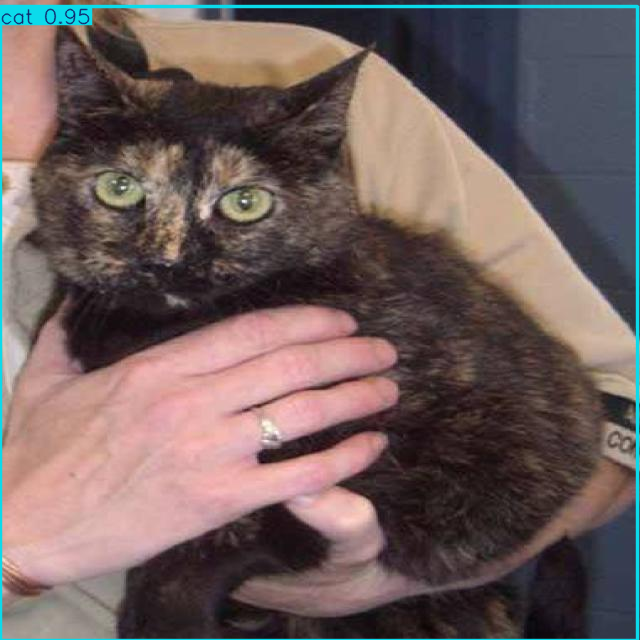

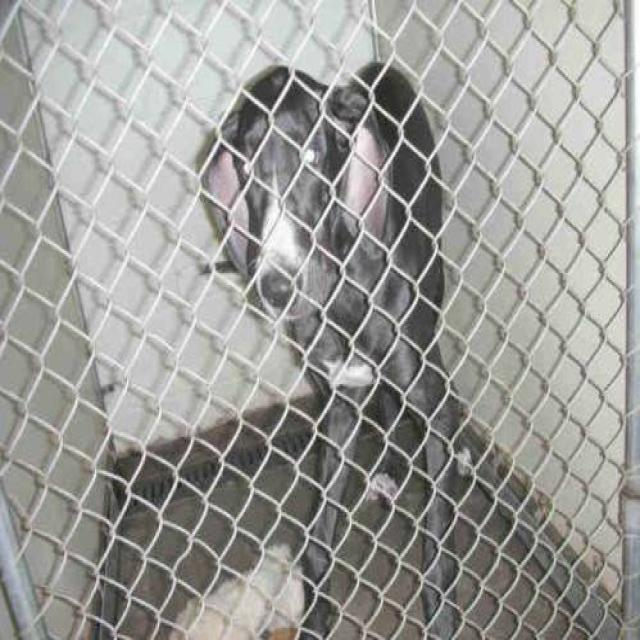

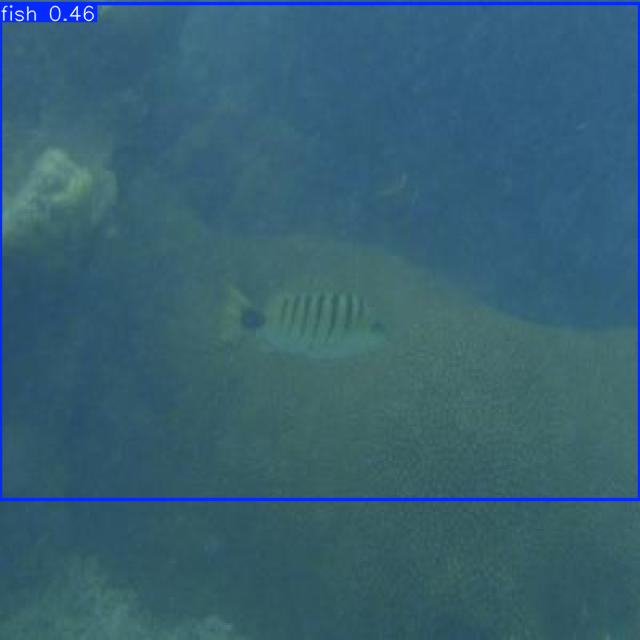

In [ ]:
from ultralytics import YOLO

# Lade das trainierte Modell
model = YOLO('/content/yolov8_training_results/yolov8_model/weights/best.pt')

# Vorhersagen auf einem Bild
results_cat = model.predict('/content/drive/MyDrive/datasets/test/images/cat_3847_jpg.rf.65fa7c295b0833e058a56b179c265f43.jpg', conf= .50)
results_dog = model.predict('/content/drive/MyDrive/datasets/test/images/dog_201_jpg.rf.77fd2b15989d2b6e6b5c5db27d05586f.jpg', conf= .50)
results_fish = model.predict('/content/drive/MyDrive/datasets/test/images/FishDataset555_png.rf.7fce42e3b6848f37ed0532e931ab7909.jpg', conf= .25)
results_fish = model.predict('/content/drive/MyDrive/datasets/test/images/FishDataset555_png.rf.7fce42e3b6848f37ed0532e931ab7909.jpg', conf= .25)

# Ergebnisse anzeigen

results_cat[0].show()  # Zugriff auf das erste Element der Liste und zeigen
results_dog[0].show()
results_fish[0].show()